## DICOM to NIfTI conversion
It can be very useful to concert DICOM files to the NIftI format before further processing as NIfTI files are easier to handle. There are many tools, we will use dicom2nifti:

In [1]:
import dicom2nifti
from pathlib import Path

In order to demonstrate DICOM to NIfTI conversion we will use the DICOM data set 

In [2]:
path_to_dicom = "SE000001/"

In [3]:
dicom2nifti.convert_directory(path_to_dicom, ".")

You will now find the file *201_t2w_tse.nii.gz* in the current path

## Read NIfTI files

Now, we proceed to the process of reading and exploring NIfTI files

First we import the necessary packages

## Imports

* nibabel to handle nifti files
* matplotlib to plot the images 

In [4]:
import nibabel as nib
import matplotlib.pyplot as plt

This single NIfTI file created above contains the complete 3D mri scan! (In dicom format there was 27 files) <br />
We can load it by using *nib.load(path)*

In [5]:
nifti = nib.load("201_t2w_tse.nii.gz")

You can print this object in order to look at metadata including the NIftI **header** information:

In [6]:
print(nifti)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 27)
affine:
[[-9.36898887e-01  3.20514254e-02  6.37919828e-02  1.15272324e+02]
 [ 3.03588901e-02  9.27917123e-01 -8.33337128e-01 -9.72956390e+01]
 [ 1.43172191e-02  1.29802674e-01  5.94150448e+00 -8.23735046e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256  27   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         0.9375     0.9375     5.9999995  1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal

You can access single header entries in the following simple way:

You can access single metadata entries as follows:

In [7]:
nifti.header["magic"]

array(b'n+1', dtype='|S4')

In [8]:
print(nifti.shape) # get the image shape as in numpy
print(nifti.header.get_data_shape())

(256, 256, 27)
(256, 256, 27)


Obtaining image **pixel data**:

The image pixel data can be extracted using the *get_fdata()* function of the nifti object.

In [9]:
image_array = nifti.get_fdata()
print(image_array.dtype, image_array.shape)

float64 (256, 256, 27)


In [10]:
print(nib.aff2axcodes(nifti.affine))
print(image_array[:,4,:].shape)

('L', 'A', 'S')
(256, 27)


We can finally take a look at the brain scan. <br />

Don't forget to pass cmap="gray" or "bone" to imshow, otherwise your image will look quite odd

In [11]:
image_array[:,:,4] # You have to access images with this slicing
#otherwise it won't plot it as you expect

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

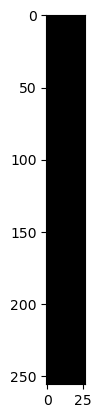

In [12]:
plt.imshow(image_array[4, :, :], cmap="gray",)

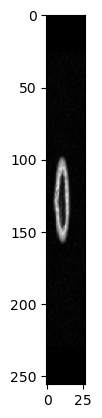

In [13]:
plt.imshow(image_array[:, 4, :], cmap="gray",)

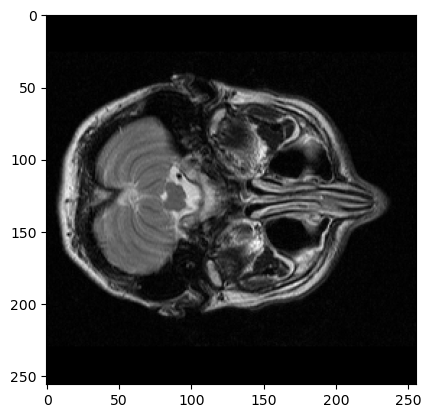

In [14]:
plt.imshow(image_array[:,:,4], cmap="gray",)

Lets plot

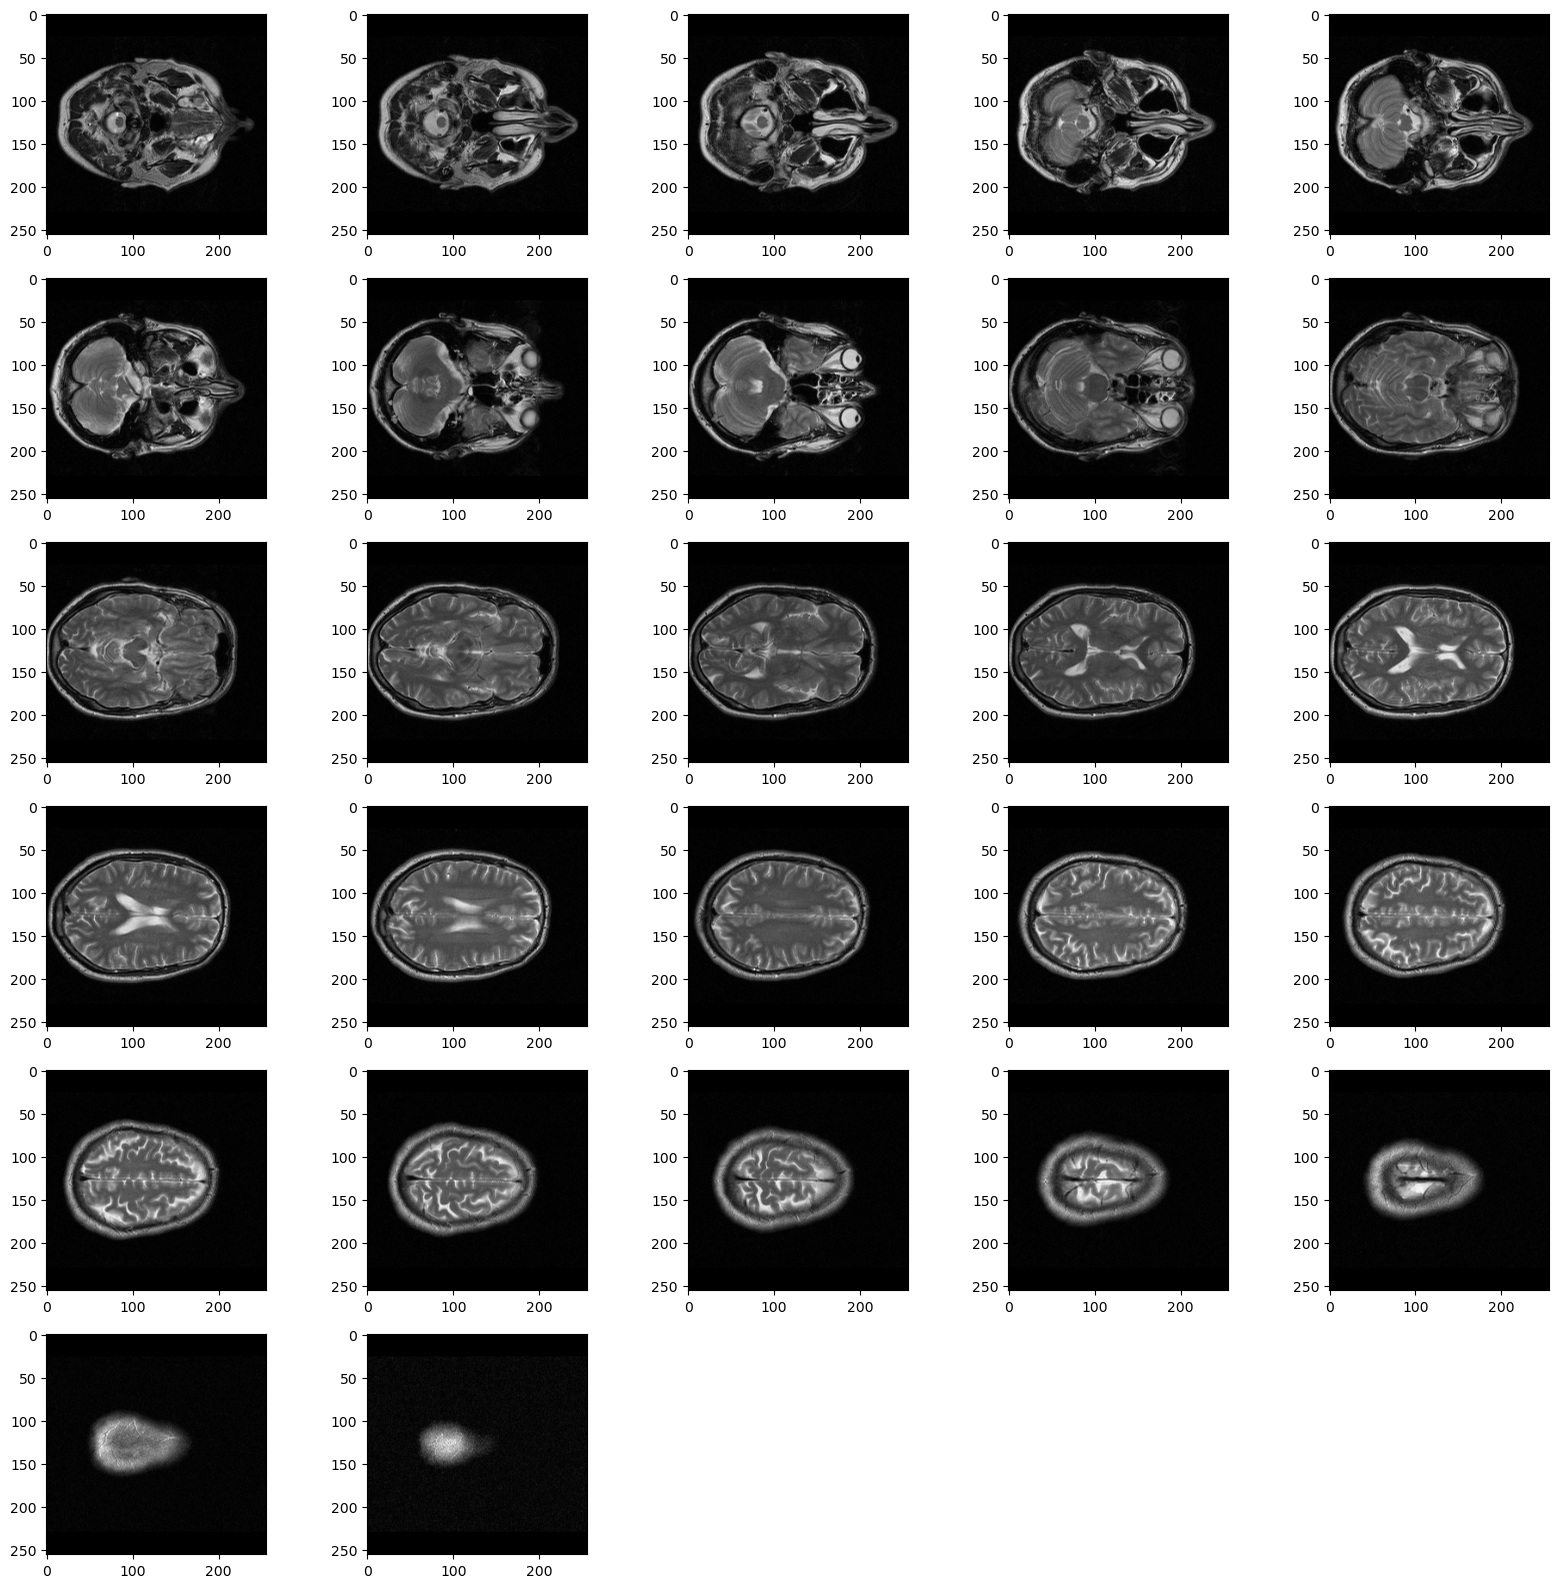

In [15]:
fig, axis = plt.subplots(6, 5, figsize = (20, 20))

slice_counter = 0
for i in range(0,6):
    for j in range(0,5):
        if (slice_counter < 27):
            axis[i][j].imshow(image_array[:,:, slice_counter], cmap = "gray")
            slice_counter = slice_counter + 1;
        else:
            plt.delaxes(axis[i,j]) 

### Write NIfTI files
Manytimes, you will obtain image data as the results of an algorithm or processing step that you want to store in the NIfTI format. This can be easily done using NiBabel. As an example, We use the 3D image array from above, perform a simple processing step and save it as a new NIfTI file.

In [16]:
# Here we apply a very simple treshold and set all image voxels to 0
# that have a value smaller than 300
image_array_processed = image_array * (image_array > 300)

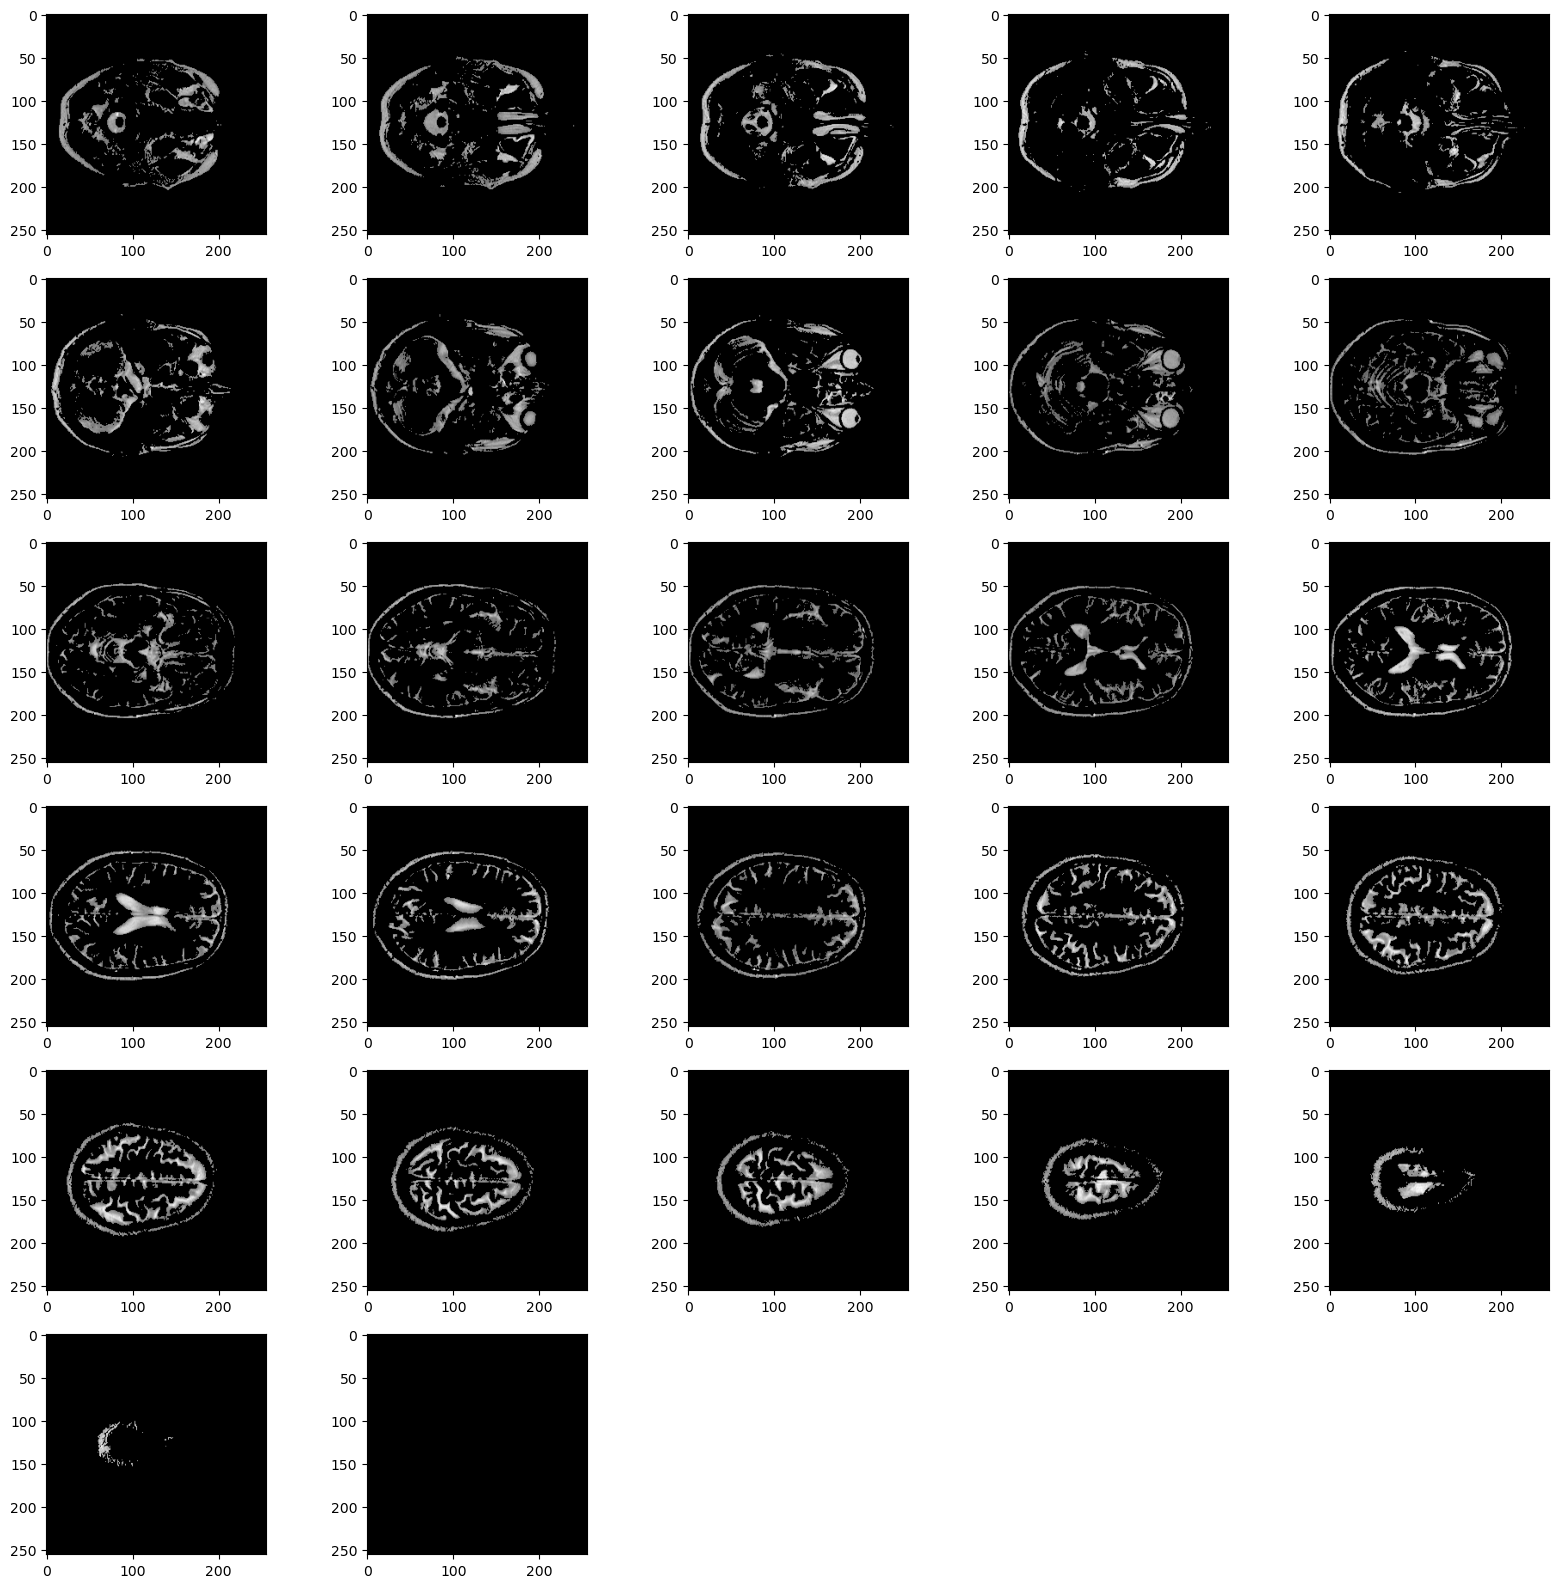

In [17]:
fig, axis = plt.subplots(6, 5, figsize = (20, 20))

slice_counter = 0
for i in range(0,6):
    for j in range(0,5):
        if (slice_counter < 27):
            axis[i][j].imshow(image_array_processed[:,:, slice_counter], cmap = "gray")
            slice_counter = slice_counter + 1;
        else:
            plt.delaxes(axis[i,j]) 

First we convert the processed image array back to a nifti object. To this end we use the numpy array of the processed image and header information about the image geometry (affine matrix) from the original NIftI file:

In [18]:
processed_nifti = nib.Nifti1Image(image_array_processed, nifti.affine)

We can now save the processed image using the save function in NiBabel:

In [19]:
nib.save(processed_nifti, "201_t2w_tse_processed.nii.gz")